# Important Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling
import datetime
import numpy as np
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
from IPython.display import clear_output
plotly.tools.set_credentials_file(username='_C_H_R', api_key='Ig3S5l7BqCpiqiQXbNxc')
plotly.offline.init_notebook_mode()

import seaborn as sns
from sklearn import linear_model
from scipy import stats

#to enhance image quality of matploblib plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/home/swc/anaconda3/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/swc/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/swc/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/swc/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loo

# Datasets provided

In [2]:
cd Desktop/GW/

/home/swc/Desktop/GW


In [3]:
ls

carriers.csv  Flights per week of each Airline.html  stacked-bar2.html
flights.csv   holidays.csv*                          stacked-bar.html


In [4]:
carriers = pd.read_csv("carriers.csv")
flights = pd.read_csv("flights.csv")
holidays = pd.read_csv("holidays.csv")

## Part 1 - Checking Load Data

In [5]:
#Changing defenitely the name of the old column "Code" to "OP_UNIQUE_CARRIER" to merge carrier into flights later
carriers = carriers.rename(columns={"Code":"OP_UNIQUE_CARRIER"})

In [6]:
flights

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER TAIL_NUM  \
0       2018      1            27            6                UA   N26232   
1       2018      1            27            6                UA   N477UA   
2       2018      1            27            6                UA   N13720   
3       2018      1            27            6                UA   N16217   
4       2018      1            27            6                UA   N33714   
5       2018      1            27            6                UA   N809UA   
6       2018      1            27            6                UA   N59053   
7       2018      1            27            6                UA   N59053   
8       2018      1            27            6                UA   N37255   
9       2018      1            27            6                UA   N73259   
10      2018      1            27            6                UA   N424UA   
11      2018      1            27            6                UA   N36469   
12      2018      1            27            6                UA   N421UA   
13      2018      1            27            6                UA   N17753   
14      2018      1            27            6                UA   N27477   
15      2018      1            27            6                UA   N462UA   
16      2018      1            27            6                UA   N39463   
17      2018      1            27            6                UA   N39463   
18      2018      1            27            6                UA   N811UA   
19      2018      1            27            6                UA   N54711   
20      2018      1            27            6                UA   N771UA   
21      2018      1            27            6                UA   N441UA   
22      2018      1            27            6                UA   N835UA   
23      2018      1            27            6                UA   N676UA   
24      2018      1            27            6                UA   N676UA   
25      2018      1            27            6                UA   N69847   
26      2018      1            27            6                UA   N79541   
27      2018      1            27            6                UA   N23708   
28      2018      1            27            6                UA   N76503   
29      2018      1            27            6                UA   N69810   
...      ...    ...           ...          ...               ...      ...   
570088  2018      1            11            4                DL   N990DL   
570089  2018      1            11            4                DL   N814DN   
570090  2018      1            11            4                DL   N917DN   
570091  2018      1            11            4                DL   N916DN   
570092  2018      1            11            4                DL   N302NB   
570093  2018      1            11            4                DL   N837DN   
570094  2018      1            11            4                DL   N950DL   
570095  2018      1            11            4                DL   N950DL   
570096  2018      1            11            4                DL   N339NB   
570097  2018      1            11            4                DL   N926AT   
570098  2018      1            11            4                DL   N925DN   
570099  2018      1            11            4                DL   N355NW   
570100  2018      1            11            4                DL   N682DA   
570101  2018      1            11            4                DL   N682DA   
570102  2018      1            11            4                DL   N948DN   
570103  2018      1            11            4                DL   N330NB   
570104  2018      1            11            4                DL   N702TW   
570105  2018      1            11            4                DL   N357NB   
570106  2018      1            11            4                DL   N903DE   
570107  2018      1            11            4                DL   N903DE   
5701

## Question 1
* What is the number of rows loaded and what is the number of rows tht contain unfilled (null) attributes? Analyse the importance of columns with null values.

In [7]:
print("The number of rows loaded is", flights.shape[0])

The number of rows loaded is 570118


In [8]:
#to drop the useless column
flights = flights.drop(columns="Unnamed: 23")

In [9]:
Null_Values = flights.isnull().sum(axis=0).to_frame().reset_index()
Null_Values = Null_Values.rename(columns={0:"Nº of Null Values"})
print("The number of rows that contain unfilled (null) attributes is", int(len(flights)-len(flights.dropna())))
Null_Values

The number of rows that contain unfilled (null) attributes is 19096


index  Nº of Null Values
0                  YEAR                  0
1                 MONTH                  0
2          DAY_OF_MONTH                  0
3           DAY_OF_WEEK                  0
4     OP_UNIQUE_CARRIER                  0
5              TAIL_NUM               1969
6     OP_CARRIER_FL_NUM                  0
7                ORIGIN                  0
8      ORIGIN_CITY_NAME                  0
9                  DEST                  0
10       DEST_CITY_NAME                  0
11         CRS_DEP_TIME                  0
12             DEP_TIME              16823
13            DEP_DELAY              17323
14         CRS_ARR_TIME                  0
15             ARR_TIME              17535
16            ARR_DELAY              18620
17            CANCELLED                  0
18             DIVERTED                  0
19     CRS_ELAPSED_TIME                  0
20  ACTUAL_ELAPSED_TIME              18418
21             AIR_TIME              18418
22             DISTANCE                  0

## Question 2
* Select the columns you consider dispensable by removing them from the data in memory. 

In [10]:
#Remove Tail_NUM
flights = flights.drop(["TAIL_NUM"], 1)
flights
#Substitute all Null values by the mean of each column
mean1 = int(flights["DEP_TIME"].mean())
mean2 = int(flights["DEP_DELAY"].mean())
mean3 = int(flights["ARR_TIME"].mean())
mean4 = int(flights["ARR_DELAY"].mean())
mean5 = int(flights["ACTUAL_ELAPSED_TIME"].mean())
mean6 = int(flights["AIR_TIME"].mean())

values = {'DEP_TIME': mean1, 'DEP_DELAY': mean2, 'ARR_TIME': mean3, 'ARR_DELAY': mean4,\
          'ACTUAL_ELAPSED_TIME': mean5,'AIR_TIME': mean6}
flights = flights.fillna(value=values)

In [11]:
#Test if we have correctly substitute all the Null Values of each column A by the mean of each column A
#if query shows nothing, that means there is no null value anymore on the column for test
query = flights["ARR_TIME"] == None
flights.ARR_TIME[query].to_frame()

Empty DataFrame
Columns: [ARR_TIME]
Index: []

# Part 2 - Information about the US air transportation sector size as well as data related to delays

## Question 1
* Plot the number of flights per day. 

Text(0,0.5,'Nº of flights (per day)')

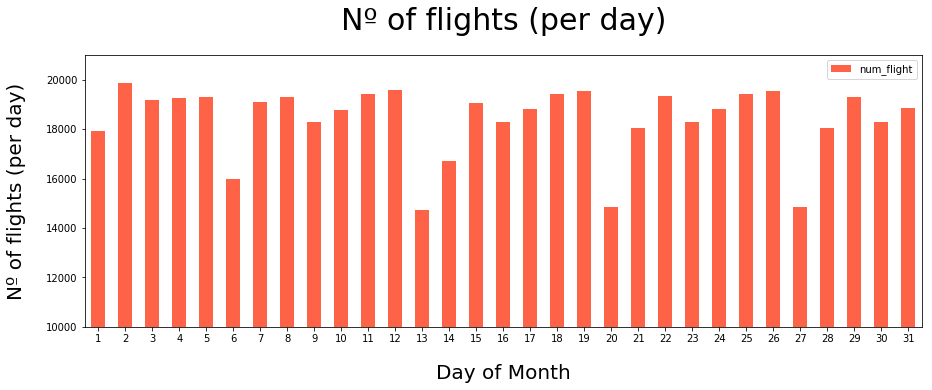

In [12]:
#to create a new variable that is grouped by DAY_OF_MONTH, showing in the final result n of flights per day
flight_per_day = flights.groupby(by="DAY_OF_MONTH").size().to_frame().rename(columns={0:"num_flight"}).reset_index()
#make a graph with flight_per_day
flight_per_day.plot.bar(x="DAY_OF_MONTH",y="num_flight", width = 0.5, color = "tomato", figsize =(15, 5))
plt.xticks(rotation=0)
plt.ylim(10000, 21000)
plt.title("Nº of flights (per day)", fontsize=30, pad=25)
plt.xlabel("Day of Month", fontsize = 20, labelpad = 20)
plt.ylabel("Nº of flights (per day)", fontsize = 20, labelpad = 20)

## Question 2 
* How many airlines are there?
* How many flights does each airline have?

In [13]:
#Adding the column description from carriers_csv to the flights table

final_csv = flights.merge(carriers, how="left",on="OP_UNIQUE_CARRIER")
final_csv

#Moving the column Description from the last position to the righ of OP_UNIQUE_CARRIER(Code)
cols = final_csv.columns.tolist()
column_to_move = "Description"
new_position = 5
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
flights1 = final_csv[cols]
flights1
#final version with carriers' full name behind the column of its code

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK OP_UNIQUE_CARRIER  \
0       2018      1            27            6                UA   
1       2018      1            27            6                UA   
2       2018      1            27            6                UA   
3       2018      1            27            6                UA   
4       2018      1            27            6                UA   
5       2018      1            27            6                UA   
6       2018      1            27            6                UA   
7       2018      1            27            6                UA   
8       2018      1            27            6                UA   
9       2018      1            27            6                UA   
10      2018      1            27            6                UA   
11      2018      1            27            6                UA   
12      2018      1            27            6                UA   
13      2018      1            27            6                UA   
14      2018      1            27            6                UA   
15      2018      1            27            6                UA   
16      2018      1            27            6                UA   
17      2018      1            27            6                UA   
18      2018      1            27            6                UA   
19      2018      1            27            6                UA   
20      2018      1            27            6                UA   
21      2018      1            27            6                UA   
22      2018      1            27            6                UA   
23      2018      1            27            6                UA   
24      2018      1            27            6                UA   
25      2018      1            27            6                UA   
26      2018      1            27            6                UA   
27      2018      1            27            6                UA   
28      2018      1            27            6                UA   
29      2018      1            27            6                UA   
...      ...    ...           ...          ...               ...   
570088  2018      1            11            4                DL   
570089  2018      1            11            4                DL   
570090  2018      1            11            4                DL   
570091  2018      1            11            4                DL   
570092  2018      1            11            4                DL   
570093  2018      1            11            4                DL   
570094  2018      1            11            4                DL   
570095  2018      1            11            4                DL   
570096  2018      1            11            4                DL   
570097  2018      1            11            4                DL   
570098  2018      1            11            4                DL   
570099  2018      1            11            4                DL   
570100  2018      1            11            4                DL   
570101  2018      1            11            4                DL   
570102  2018      1            11            4                DL   
570103  2018      1            11            4                DL   
570104  2018      1            11            4                DL   
570105  2018      1            11            4                DL   
570106  2018      1            11            4                DL   
570107  2018      1            11            4                DL   
570108  2018      1            11            4                DL   
570109  2018      1            11            4                DL   
570110  2018      1            11            4                DL   
570111  2018      1            11            4                DL   
570112  2018      1            11            4                DL   
570113  2018      1            11            4                DL   
570114  2018      1            11            4                DL

There are  18  airlines



Text(0,0.5,'Nº of flights')

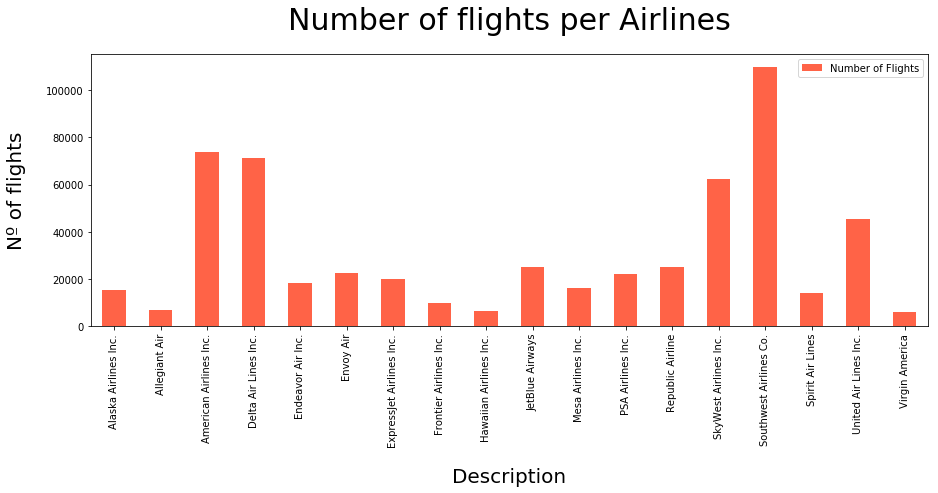

In [14]:
#to group the number of flights by the name of Airline
flights_per_airline = flights1.groupby("Description").size().to_frame().reset_index()\
                        .rename(columns={0:"Number of Flights"})
print("There are ",len(flights_per_airline["Description"].unique())," airlines\n")
flights_per_airline.plot.bar(x="Description",y="Number of Flights", width = 0.5, color = "tomato", figsize =(15, 5))
plt.xticks(rotation=90)
plt.title("Number of flights per Airlines", fontsize=30, pad=25)
plt.xlabel("Description", fontsize = 20, labelpad = 20)
plt.ylabel("Nº of flights", fontsize = 20, labelpad = 20)


* Is there a significant variation in the number of flights from week to week per company?

In [15]:
#define a function to identify the corresponding week of a flight
#create a new column called NUM_OF_WEEK by applying the function above using as input YEAR,MONTH,DAY_OF_MONTH
def num_week(YEAR,MONTH,DAY_OF_MONTH):
    n = datetime.date(YEAR,MONTH,DAY_OF_MONTH).isocalendar()[1]
    return n
flights1["NUM_OF_WEEK"] = flights1.apply(lambda row: num_week(row["YEAR"],row["MONTH"],row["DAY_OF_MONTH"]),axis =1)
flights1[["YEAR","MONTH","DAY_OF_MONTH","NUM_OF_WEEK"]]

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



YEAR  MONTH  DAY_OF_MONTH  NUM_OF_WEEK
0       2018      1            27            4
1       2018      1            27            4
2       2018      1            27            4
3       2018      1            27            4
4       2018      1            27            4
5       2018      1            27            4
6       2018      1            27            4
7       2018      1            27            4
8       2018      1            27            4
9       2018      1            27            4
10      2018      1            27            4
11      2018      1            27            4
12      2018      1            27            4
13      2018      1            27            4
14      2018      1            27            4
15      2018      1            27            4
16      2018      1            27            4
17      2018      1            27            4
18      2018      1            27            4
19      2018      1            27            4
20      2018      1            27            4
21      2018      1            27            4
22      2018      1            27            4
23      2018      1            27            4
24      2018      1            27            4
25      2018      1            27            4
26      2018      1            27            4
27      2018      1            27            4
28      2018      1            27            4
29      2018      1            27            4
...      ...    ...           ...          ...
570088  2018      1            11            2
570089  2018      1            11            2
570090  2018      1            11            2
570091  2018      1            11            2
570092  2018      1            11            2
570093  2018      1            11            2
570094  2018      1            11            2
570095  2018      1            11            2
570096  2018      1            11            2
570097  2018      1            11            2
570098  2018      1            11            2
570099  2018      1            11            2
570100  2018      1            11            2
570101  2018      1            11            2
570102  2018      1            11            2
570103  2018      1            11            2
570104  2018      1            11            2
570105  2018      1            11            2
570106  2018      1            11            2
570107  2018      1            11            2
570108  2018      1            11            2
570109  2018      1            11            2
570110  2018      1            11            2
570111  2018      1            11            2
570112  2018      1            11            2
570113  2018      1            11            2
570114  2018      1            11            2
570115  2018      1            11            2
570116  2018      1            11            2
570117  2018      1            11            2

[570118 rows x 4 columns]

In [16]:
#Moving the column NUM_OF_WEEK to the righ of DAY_OF_WEEK
cols = flights1.columns.tolist()
column_to_move = "NUM_OF_WEEK"
new_position = 4
cols.insert(new_position, cols.pop(cols.index(column_to_move)))
flights1 = flights1[cols]
flights1

YEAR  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  NUM_OF_WEEK OP_UNIQUE_CARRIER  \
0       2018      1            27            6            4                UA   
1       2018      1            27            6            4                UA   
2       2018      1            27            6            4                UA   
3       2018      1            27            6            4                UA   
4       2018      1            27            6            4                UA   
5       2018      1            27            6            4                UA   
6       2018      1            27            6            4                UA   
7       2018      1            27            6            4                UA   
8       2018      1            27            6            4                UA   
9       2018      1            27            6            4                UA   
10      2018      1            27            6            4                UA   
11      2018      1            27            6            4                UA   
12      2018      1            27            6            4                UA   
13      2018      1            27            6            4                UA   
14      2018      1            27            6            4                UA   
15      2018      1            27            6            4                UA   
16      2018      1            27            6            4                UA   
17      2018      1            27            6            4                UA   
18      2018      1            27            6            4                UA   
19      2018      1            27            6            4                UA   
20      2018      1            27            6            4                UA   
21      2018      1            27            6            4                UA   
22      2018      1            27            6            4                UA   
23      2018      1            27            6            4                UA   
24      2018      1            27            6            4                UA   
25      2018      1            27            6            4                UA   
26      2018      1            27            6            4                UA   
27      2018      1            27            6            4                UA   
28      2018      1            27            6            4                UA   
29      2018      1            27            6            4                UA   
...      ...    ...           ...          ...          ...               ...   
570088  2018      1            11            4            2                DL   
570089  2018      1            11            4            2                DL   
570090  2018      1            11            4            2                DL   
570091  2018      1            11            4            2                DL   
570092  2018      1            11            4            2                DL   
570093  2018      1            11            4            2                DL   
570094  2018      1            11            4            2                DL   
570095  2018      1            11            4            2                DL   
570096  2018      1            11            4            2                DL   
570097  2018      1            11            4            2                DL   
570098  2018      1            11            4            2                DL   
570099  2018      1            11            4            2                DL   
570100  2018      1            11            4            2                DL   
570101  2018      1            11            4            2                DL   
570102  2018      1            11            4            2                DL   
570103  2018      1            11            4            2                DL   
570104  2018      1            11            4            2                DL   
570105  2018      1            11      

In [17]:
#we created new variable by grouping firstly "Description", getting flights per airline, then by "NUM_OF_WEEK"
#to get flights per airline grouped into different weeks
flights_airlines_per_week = flights1.groupby(["Description",'NUM_OF_WEEK']).size().reset_index()\
                            .rename(columns={0:"Flights"})
flights_airlines_per_week

Description  NUM_OF_WEEK  Flights
0     Alaska Airlines Inc.            1     3500
1     Alaska Airlines Inc.            2     3449
2     Alaska Airlines Inc.            3     3423
3     Alaska Airlines Inc.            4     3443
4     Alaska Airlines Inc.            5     1497
5            Allegiant Air            1     1812
6            Allegiant Air            2     1532
7            Allegiant Air            3     1494
8            Allegiant Air            4     1486
9            Allegiant Air            5      490
10  American Airlines Inc.            1    17394
11  American Airlines Inc.            2    16344
12  American Airlines Inc.            3    16340
13  American Airlines Inc.            4    16422
14  American Airlines Inc.            5     7098
15    Delta Air Lines Inc.            1    15030
16    Delta Air Lines Inc.            2    15897
17    Delta Air Lines Inc.            3    16473
18    Delta Air Lines Inc.            4    16508
19    Delta Air Lines Inc.            5     7346
20       Endeavor Air Inc.            1     3665
21       Endeavor Air Inc.            2     4075
22       Endeavor Air Inc.            3     4259
23       Endeavor Air Inc.            4     4268
24       Endeavor Air Inc.            5     1967
25               Envoy Air            1     5222
26               Envoy Air            2     5024
27               Envoy Air            3     4992
28               Envoy Air            4     5032
29               Envoy Air            5     2232
..                     ...          ...      ...
60        Republic Airline            1     5607
61        Republic Airline            2     5600
62        Republic Airline            3     5706
63        Republic Airline            4     5726
64        Republic Airline            5     2573
65   SkyWest Airlines Inc.            1    13807
66   SkyWest Airlines Inc.            2    13791
67   SkyWest Airlines Inc.            3    14138
68   SkyWest Airlines Inc.            4    14165
69   SkyWest Airlines Inc.            5     6293
70  Southwest Airlines Co.            1    25606
71  Southwest Airlines Co.            2    24345
72  Southwest Airlines Co.            3    24398
73  Southwest Airlines Co.            4    24396
74  Southwest Airlines Co.            5    10931
75        Spirit Air Lines            1     3202
76        Spirit Air Lines            2     3204
77        Spirit Air Lines            3     3203
78        Spirit Air Lines            4     3204
79        Spirit Air Lines            5     1367
80   United Air Lines Inc.            1    11339
81   United Air Lines Inc.            2     9878
82   United Air Lines Inc.            3     9912
83   United Air Lines Inc.            4     9924
84   United Air Lines Inc.            5     4331
85          Virgin America            1     1338
86          Virgin America            2     1316
87          Virgin America            3     1299
88          Virgin America            4     1302
89          Virgin America            5      569

[90 rows x 3 columns]

In [19]:
#"airline" initially is a variable with range of 18 and corresponding airline name
#we used a "for loop" to insert into airline , the corresponding part of each airline flights per week.
# "airline[0]" will show an array that contains the number of flights per week of airline 0 defined initially in airline
airline = flights_airlines_per_week.Description.unique()
for i in range(0,len(airline)):
    s = flights_airlines_per_week.Description == airline[i]
    airline[i] = flights_airlines_per_week[s]
    print(airline[i])

            Description  NUM_OF_WEEK  Flights
0  Alaska Airlines Inc.            1     3500
1  Alaska Airlines Inc.            2     3449
2  Alaska Airlines Inc.            3     3423
3  Alaska Airlines Inc.            4     3443
4  Alaska Airlines Inc.            5     1497
     Description  NUM_OF_WEEK  Flights
5  Allegiant Air            1     1812
6  Allegiant Air            2     1532
7  Allegiant Air            3     1494
8  Allegiant Air            4     1486
9  Allegiant Air            5      490
               Description  NUM_OF_WEEK  Flights
10  American Airlines Inc.            1    17394
11  American Airlines Inc.            2    16344
12  American Airlines Inc.            3    16340
13  American Airlines Inc.            4    16422
14  American Airlines Inc.            5     7098
             Description  NUM_OF_WEEK  Flights
15  Delta Air Lines Inc.            1    15030
16  Delta Air Lines Inc.            2    15897
17  Delta Air Lines Inc.            3    16473
18  Delt

In [20]:
#list_x is a variable of x line of graph
#dict_flight_airline_week will be the dictionary with keys as name of each airline, and corresponding flights of 5 weeks
# in each keys value

dict_flight_airline_week={}
for i in range(0,18):
    airline_name = airline[i].Description.unique().tolist()[0]
    dict_flight_airline_week[airline_name] = airline[i].Flights.tolist()
dict_flight_airline_week

{'Alaska Airlines Inc.': [3500, 3449, 3423, 3443, 1497],
 'Allegiant Air': [1812, 1532, 1494, 1486, 490],
 'American Airlines Inc.': [17394, 16344, 16340, 16422, 7098],
 'Delta Air Lines Inc.': [15030, 15897, 16473, 16508, 7346],
 'Endeavor Air Inc.': [3665, 4075, 4259, 4268, 1967],
 'Envoy Air': [5222, 5024, 4992, 5032, 2232],
 'ExpressJet Airlines Inc.': [4572, 4463, 4531, 4542, 2058],
 'Frontier Airlines Inc.': [2155, 2205, 2209, 2200, 938],
 'Hawaiian Airlines Inc.': [1512, 1488, 1493, 1500, 634],
 'JetBlue Airways': [5714, 5591, 5580, 5566, 2420],
 'Mesa Airlines Inc.': [4023, 3600, 3590, 3606, 1534],
 'PSA Airlines Inc.': [5055, 4957, 5020, 5021, 2157],
 'Republic Airline': [5607, 5600, 5706, 5726, 2573],
 'SkyWest Airlines Inc.': [13807, 13791, 14138, 14165, 6293],
 'Southwest Airlines Co.': [25606, 24345, 24398, 24396, 10931],
 'Spirit Air Lines': [3202, 3204, 3203, 3204, 1367],
 'United Air Lines Inc.': [11339, 9878, 9912, 9924, 4331],
 'Virgin America': [1338, 1316, 1299, 130

In [21]:
#instead of inserting 18 variables of trace to create graph we decided to create a list called data, where it will fill traces info
#by using a for loop of different names of airline.

#We define i as each airlines info(go.Scatter), inside it we have 
# "x = x1" where all the trace will have on their x label - the different weeks. 

#In terms of y, we have "y=dict_flight_airline_week[i]", each y will be the values of different keys on the dictionary
# of number of flight per airline per week showed above, for example for key "Virgin America" we will have
# 1338, 1316, 1299, 1302, 569

#Each time for loop runs, in the end, i - the info of trace of each airline will be added to data
list_x = ["Week1","Week2","Week3","Week4","Week5"]
x1 = list_x
dict_info_for_plotly={}
data=[]
for i in dict_flight_airline_week.keys():
    i = go.Scatter(
    x = x1,
    y = dict_flight_airline_week[i],
    mode = 'lines+markers',
    name = i)  
    data.append(i)
layout = dict(title = 'Flights per week of each Airline',
              yaxis = dict(title = 'Number of Flights'),
              )
fig = dict(data=data, layout=layout)
plotly.offline.plot(fig, filename='Flights per week of each Airline.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)


## Question 3
* Which airports have the most flights per day? 

In [22]:
#We created new variable by grouping "ORIGIN", getting flights per airport
Airports = flights.groupby(by="ORIGIN").size().to_frame().rename(columns={0:"Nº of flights"}).reset_index()
Airports_high = Airports.sort_values(["Nº of flights"], ascending= [False])
Airports_high_top_5 = Airports_high.head()
Airports_high_top_5

ORIGIN  Nº of flights
18     ATL          30617
230    ORD          25680
86     DFW          22349
67     CLT          18362
85     DEN          18231

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(0,0.5,'Average nº of flights (per day)')

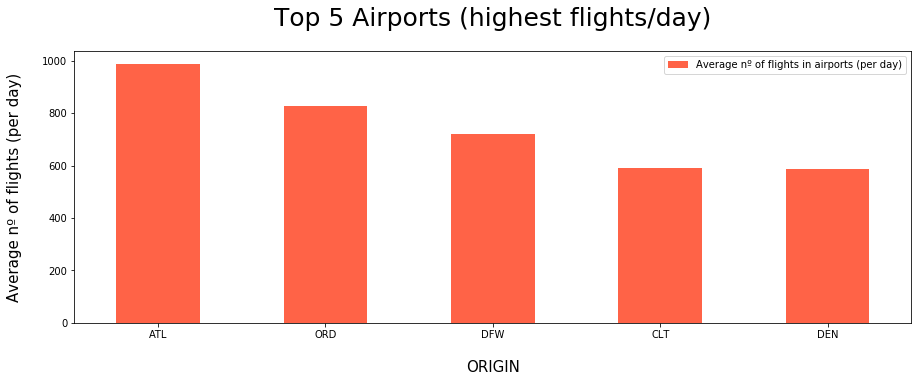

In [23]:
#Now that we have the number of flights per airport, firstly we have evaluated the average flights per day, we divided it
#by the 31 days, and that's why we apply the lambda to the column Nº of flights
Airports_high_top_5 
Airports_high_top_5["Average nº of flights in airports (per day)"] = Airports_high_top_5["Nº of flights"]\
                                                                     .apply(lambda x: x/31)
Airports_high_top_5_without_total= Airports_high_top_5.drop(columns="Nº of flights")
Airports_high_top_5_without_total
Airports_high_top_5_without_total.plot.bar(x="ORIGIN",y="Average nº of flights in airports (per day)",\
                                           width = 0.5, color = "tomato", figsize =(15, 5))
plt.xticks(rotation=0)
plt.title("Top 5 Airports (highest flights/day)", fontsize=25, pad=25)
plt.xlabel("ORIGIN", fontsize = 15, labelpad = 20)
plt.ylabel("Average nº of flights (per day)", fontsize = 15, labelpad = 20)



In [24]:
#After seeing average flight per day, we wanted to analyse how did airport flight changed day-to-day
# so we created list called data where it will memorize the info of traces
data=[]
for i in Airports_high_top_5.ORIGIN.unique():
    #Firstly define a query to seek only flights of i airport
    flightsQUERY = flights1["ORIGIN"] == i 
    
    #then apply query to flights1 the full table and get a new variable called flights_actualized with only i airport flights
    flights_actualized= flights1[flightsQUERY]
    
    #then groupby on flights_actualized by "DAY_OF_MONTH" we will eventually get how many flights per day had in airport i
    Flights_ORIGIN = flights_actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index()\
                                                        .rename(columns={0:"Number of Flights"})

    #define trace go.Bar, x as days of month and y as the num of flights 
    trace_i = go.Bar(
        x=Flights_ORIGIN["DAY_OF_MONTH"],
        y=Flights_ORIGIN["Number of Flights"],
        name=i
    )
    
    #add info of trace into data list
    data.append(trace_i) 
    
layout = go.Layout(title ='Number of Flights per day in the top 5 Airports',\
                   barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks',\
                    titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15),\
                                linecolor='#000', zeroline=True, linewidth=2))

fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename='stacked-bar.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)


* Which airports have the lowest flights per day?

In [25]:
#Same logic but with lowest by chaging ascending
Airports = flights.groupby(by="ORIGIN").size().to_frame().rename(columns={0:"Nº of flights (per airport)"}).reset_index()
Airports_low = Airports.sort_values(["Nº of flights (per airport)"], ascending= [True])
Airports_low_top_5 = Airports_low.head()
Airports_low_top_5

ORIGIN  Nº of flights (per airport)
332    YNG                            2
27     BFF                            3
136    HGR                            9
8      ADK                            9
251    PPG                           10

Text(0,0.5,'Nº of flights ')

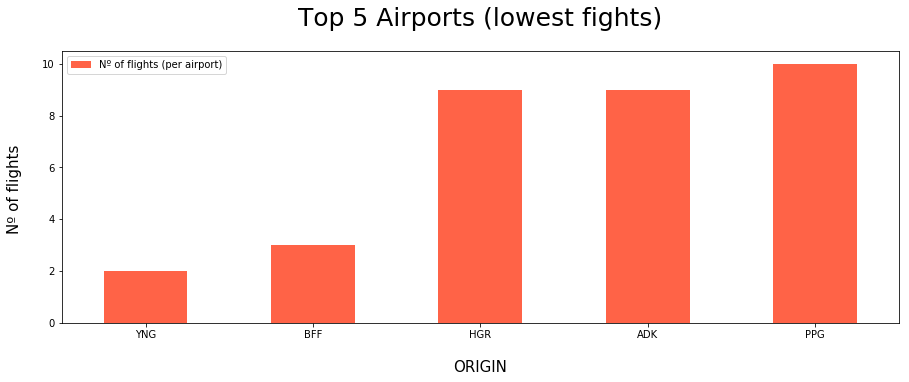

In [26]:
#We decided to not divide the flights by the 31 days because it would be irrelevant for our analysis, as the values
#would be very low.
Airports_low_top_5
Airports_low_top_5.plot.bar(x="ORIGIN",y="Nº of flights (per airport)", width = 0.5, color = "tomato", figsize =(15, 5))
plt.xticks(rotation=0)
plt.title("Top 5 Airports (lowest fights)", fontsize=25, pad=25)
plt.xlabel("ORIGIN", fontsize = 15, labelpad = 20)
plt.ylabel("Nº of flights ", fontsize = 15, labelpad = 20)

In [125]:
#Same logic but chaging only variable names
data2=[]
for i in Airports_low_top_5.ORIGIN.unique():

    flightsQUERY = flights1["ORIGIN"] == i 
    flights_actualized= flights1[flightsQUERY]

    Flights_ORIGIN = flights_actualized.groupby("DAY_OF_MONTH").size().to_frame().reset_index().rename(columns={0:"Number of Flights"})

        
    trace_i = go.Bar(
        x=Flights_ORIGIN["DAY_OF_MONTH"],
        y=Flights_ORIGIN["Number of Flights"],
        name=i
    )

    data2.append(trace_i) 
    
layout = go.Layout(title ='Number of Flights per day in the lowest top 5 Airports',\
                   barmode='stack', xaxis = dict(title = "Day of Month", mirror='ticks',\
                    titlefont = dict(color='#7f7f7f', size = 15), linecolor='#000', zeroline=True, linewidth=2),
                   yaxis = dict(title = "Flights", mirror='ticks', titlefont = dict(color='#7f7f7f', size = 15),\
                                linecolor='#000', zeroline=True, linewidth=2))

fig = go.Figure(data=data2, layout=layout)
plotly.offline.plot(fig, filename='stacked-bar2.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)

* When choosing one of the largest airports, how does the number of flights per day vary?

TOP 5 Airports (high flights/day):  ['ATL', 'ORD', 'DFW', 'CLT', 'DEN']
Choose the airport to take off : ATL


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

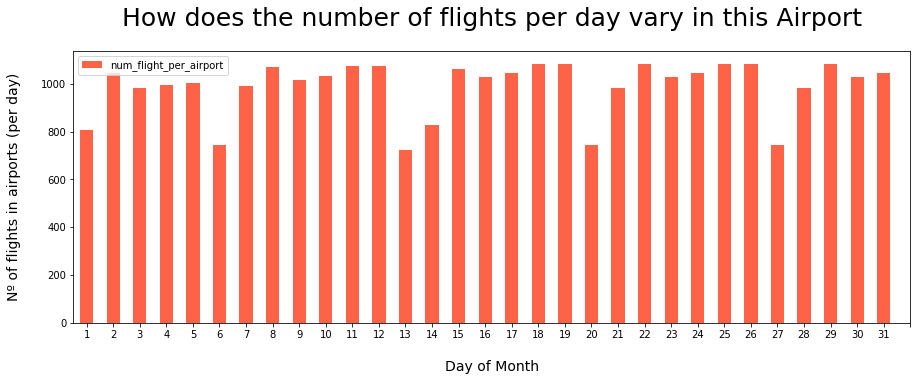

In [28]:
Airport = flights.groupby(["ORIGIN","DAY_OF_MONTH"]).size().to_frame().rename(columns={0:"num_flight_per_airport"})\
                                                    .reset_index()
print("TOP 5 Airports (high flights/day): ", Airports_high_top_5["ORIGIN"].tolist())
a = input("Choose the airport to take off : ") 
Q = Airport.ORIGIN == a

Airport[Q].plot.bar(x="DAY_OF_MONTH", y="num_flight_per_airport", width = 0.5, color = "tomato", figsize =(15, 5))
#we created a list called hours in order to have the x label with all the days of the month, as in the beggining it was 
#not showing
hours = list(range(0,32))
plt.xticks(hours)
plt.title("How does the number of flights per day vary in this Airport", fontsize=25, pad=25)
plt.xlabel("Day of Month", fontsize = 14, labelpad = 20)
plt.ylabel("Nº of flights in airports (per day)", fontsize = 14, labelpad = 20)
plt.xticks(rotation=0)

# Question 4


In [29]:
# connection_airlines is the variables grouped by Description, ORIGIN, and DEST
connection_airlines = flights1.groupby(["Description","ORIGIN","DEST"]).size().reset_index()\
                            .rename(columns={0:"flights"})
connection_airlines


Description ORIGIN DEST  flights
0     Alaska Airlines Inc.    ABQ  SEA        3
1     Alaska Airlines Inc.    ADK  ANC        9
2     Alaska Airlines Inc.    ADQ  ANC       52
3     Alaska Airlines Inc.    ANC  ADK        9
4     Alaska Airlines Inc.    ANC  ADQ       52
5     Alaska Airlines Inc.    ANC  BET       73
6     Alaska Airlines Inc.    ANC  CDV       30
7     Alaska Airlines Inc.    ANC  FAI       86
8     Alaska Airlines Inc.    ANC  HNL       31
9     Alaska Airlines Inc.    ANC  JNU      116
10    Alaska Airlines Inc.    ANC  KOA        8
11    Alaska Airlines Inc.    ANC  LAS        7
12    Alaska Airlines Inc.    ANC  LAX       27
13    Alaska Airlines Inc.    ANC  OGG       18
14    Alaska Airlines Inc.    ANC  OME       34
15    Alaska Airlines Inc.    ANC  ORD        1
16    Alaska Airlines Inc.    ANC  OTZ       56
17    Alaska Airlines Inc.    ANC  PDX       64
18    Alaska Airlines Inc.    ANC  PHX       14
19    Alaska Airlines Inc.    ANC  SCC       62
20    Alaska Airlines Inc.    ANC  SEA      366
21    Alaska Airlines Inc.    ATL  SEA       37
22    Alaska Airlines Inc.    AUS  PDX       31
23    Alaska Airlines Inc.    AUS  SEA       53
24    Alaska Airlines Inc.    BET  ANC       73
25    Alaska Airlines Inc.    BLI  KOA        4
26    Alaska Airlines Inc.    BLI  OGG       18
27    Alaska Airlines Inc.    BLI  SEA       27
28    Alaska Airlines Inc.    BNA  SEA       31
29    Alaska Airlines Inc.    BOI  SEA       31
...                    ...    ...  ...      ...
9325        Virgin America    SAN  SFO      161
9326        Virgin America    SEA  DAL       31
9327        Virgin America    SEA  LAX       57
9328        Virgin America    SEA  SFO       85
9329        Virgin America    SFO  AUS       58
9330        Virgin America    SFO  BNA       31
9331        Virgin America    SFO  BOS       59
9332        Virgin America    SFO  BWI       31
9333        Virgin America    SFO  DAL       84
9334        Virgin America    SFO  DCA       31
9335        Virgin America    SFO  DEN       59
9336        Virgin America    SFO  EWR       90
9337        Virgin America    SFO  FLL       33
9338        Virgin America    SFO  HNL       31
9339        Virgin America    SFO  IAD       58
9340        Virgin America    SFO  IND       31
9341        Virgin America    SFO  JFK      145
9342        Virgin America    SFO  KOA       31
9343        Virgin America    SFO  LAS      196
9344        Virgin America    SFO  LAX      323
9345        Virgin America    SFO  MCO       31
9346        Virgin America    SFO  MSY       31
9347        Virgin America    SFO  OGG       31
9348        Virgin America    SFO  ORD       36
9349        Virgin America    SFO  PDX       63
9350        Virgin America    SFO  PHL       31
9351        Virgin America    SFO  PSP       97
9352        Virgin America    SFO  RDU       31
9353        Virgin America    SFO  SAN      161
9354        Virgin America    SFO  SEA       83

[9355 rows x 4 columns]

In [30]:
#airline_connec is an array variable with airlines name and will be filled with respective section
# of "connection_airline" using for loop by airline name, for exmaple airline[0] will be all the flights of 
# all the airports of Alaska Airlines Inc. to all the possible Destination airport
airline_connec = connection_airlines.Description.unique()

for i in range(0,len(airline_connec)):
    query_connection = connection_airlines.Description == airline_connec[i]
    airline_connec[i] = connection_airlines[query_connection]
    print(airline_connec[i])

              Description ORIGIN DEST  flights
0    Alaska Airlines Inc.    ABQ  SEA        3
1    Alaska Airlines Inc.    ADK  ANC        9
2    Alaska Airlines Inc.    ADQ  ANC       52
3    Alaska Airlines Inc.    ANC  ADK        9
4    Alaska Airlines Inc.    ANC  ADQ       52
5    Alaska Airlines Inc.    ANC  BET       73
6    Alaska Airlines Inc.    ANC  CDV       30
7    Alaska Airlines Inc.    ANC  FAI       86
8    Alaska Airlines Inc.    ANC  HNL       31
9    Alaska Airlines Inc.    ANC  JNU      116
10   Alaska Airlines Inc.    ANC  KOA        8
11   Alaska Airlines Inc.    ANC  LAS        7
12   Alaska Airlines Inc.    ANC  LAX       27
13   Alaska Airlines Inc.    ANC  OGG       18
14   Alaska Airlines Inc.    ANC  OME       34
15   Alaska Airlines Inc.    ANC  ORD        1
16   Alaska Airlines Inc.    ANC  OTZ       56
17   Alaska Airlines Inc.    ANC  PDX       64
18   Alaska Airlines Inc.    ANC  PHX       14
19   Alaska Airlines Inc.    ANC  SCC       62
20   Alaska A

            Description ORIGIN DEST  flights
4903  PSA Airlines Inc.    ABE  CLT       62
4904  PSA Airlines Inc.    AGS  CLT       58
4905  PSA Airlines Inc.    ALB  CLT       13
4906  PSA Airlines Inc.    ALB  DCA      127
4907  PSA Airlines Inc.    ATL  CLT       68
4908  PSA Airlines Inc.    AUS  CLT        3
4909  PSA Airlines Inc.    AVL  CLT      148
4910  PSA Airlines Inc.    AVP  CLT       98
4911  PSA Airlines Inc.    BDL  CLT        7
4912  PSA Airlines Inc.    BDL  DCA       56
4913  PSA Airlines Inc.    BDL  ORD       53
4914  PSA Airlines Inc.    BHM  CLT      167
4915  PSA Airlines Inc.    BHM  DCA       34
4916  PSA Airlines Inc.    BHM  PHL       27
4917  PSA Airlines Inc.    BNA  CLT       36
4918  PSA Airlines Inc.    BNA  DCA      105
4919  PSA Airlines Inc.    BNA  LGA       27
4920  PSA Airlines Inc.    BTR  CLT       23
4921  PSA Airlines Inc.    BTV  CLT       62
4922  PSA Airlines Inc.    BTV  DCA       33
4923  PSA Airlines Inc.    BTV  PHL        4
4924  PSA 

In [31]:
#num_of_connection_per_airline will be a dict with keys as name of airline and its values as differents connections
# between airport of each airline
num_of_connection_per_airline={}
for i in range(0,18):
    airline_name = airline_connec[i].Description.unique().tolist()[0]
    num_of_connection_per_airline[airline_name] = len(airline_connec[i])

num_of_connection_per_airline

{'Alaska Airlines Inc.': 266,
 'Allegiant Air': 641,
 'American Airlines Inc.': 672,
 'Delta Air Lines Inc.': 820,
 'Endeavor Air Inc.': 504,
 'Envoy Air': 374,
 'ExpressJet Airlines Inc.': 553,
 'Frontier Airlines Inc.': 364,
 'Hawaiian Airlines Inc.': 56,
 'JetBlue Airways': 336,
 'Mesa Airlines Inc.': 317,
 'PSA Airlines Inc.': 316,
 'Republic Airline': 615,
 'SkyWest Airlines Inc.': 1181,
 'Southwest Airlines Co.': 1295,
 'Spirit Air Lines': 326,
 'United Air Lines Inc.': 631,
 'Virgin America': 88}

In [32]:
# we created two more variables for ORIGIN and DESTINATION - airline_name2 and airline_name3, where each of them
# initially will contain airlines name and then will be filled with unique possible Origin airport or unique possible
# Destination airport
unique_origin_per_airline={}
for i in range(0,18):
    airline_name2 = airline_connec[i].Description.unique().tolist()[0]
    unique_origin_per_airline[airline_name2] = airline_connec[i].ORIGIN.unique()
    
unique_dest_per_airline={}
for i in range(0,18):
    airline_name3 = airline_connec[i].Description.unique().tolist()[0]
    unique_dest_per_airline[airline_name3] = airline_connec[i].DEST.unique()
    
# for example possible Origin airport of Virgin America airline will be
print(unique_origin_per_airline["Virgin America"])


['AUS' 'BNA' 'BOS' 'BWI' 'DAL' 'DCA' 'DEN' 'EWR' 'FLL' 'HNL' 'IAD' 'IND'
 'JFK' 'KOA' 'LAS' 'LAX' 'MCO' 'MSY' 'OGG' 'ORD' 'PDX' 'PHL' 'PSP' 'RDU'
 'SAN' 'SEA' 'SFO']


In [33]:
# We defined a function called "airport_conn" with 3 arguments: input_airline, input_answer_origin_dest, and input_airport
# all of those will be inputs answered by user on next cell

def airport_conn(input_airline, answer_origin_dest, input_airport):
    #This query below aims to select only on "connection_airlines" those with same airline (Description) as user introduced
    query_input_airline = connection_airlines.Description == input_airline
    
    if answer_origin_dest == "origin":
        
        #If user choosed Origin airport we shall show them the possible Origin airport to choose
        #So this query will select from "connection_airlines" those with same Origin airport name as user introduced
        query_input_airport = connection_airlines[answer_origin_dest.upper()] == input_airport
        clear_output()
        
        print("The Airline ",input_airline," has ", num_of_connection_per_airline[input_airline]," connections\n")
        
        #After knowing the Airline and Origin Airport the user wish to know, we shall gave them
        # the possible destination airport by filtering using two query defined above on "connection_airlines" 
        # and applying unique() to get unique airport name
        print("From the Origin airport ",input_airport," of ",input_airline," we have ",
              len(connection_airlines[query_input_airline][query_input_airport].DEST.unique()),
              " possible Destination airport:\n\n",
              connection_airlines[query_input_airline][query_input_airport].DEST.unique())
        # this one is to show the full table of the result after apllying two queries, it can provide also n of flights
        print("\nHere are some additional information about number of flights between these airports\n\n"
              ,connection_airlines[query_input_airline][query_input_airport])
        
    else:
        #same logic but this time user choosed to know about Destination, so we will gave them the possible Destination 
        # airport and then filter it, and show them the possible Origin airport to get to introduced Destination
        query_input_airport = connection_airlines.DEST == input_airport
        clear_output()
        print("The Airline ",input_airline," has ", num_of_connection_per_airline[input_airline]," connections\n")
        print("To get to the Destination airport ",input_airport," by using ",input_airline," we have ",
              len(connection_airlines[query_input_airline][query_input_airport].ORIGIN.unique()),
              " possible Origin airport:\n\n",
              connection_airlines[query_input_airline][query_input_airport].ORIGIN.unique())
        print("\nHere are some additional information about number of flights between these airports\n\n",
              connection_airlines[query_input_airline][query_input_airport])

In [34]:
#From a list of Airline names, user will choose one by copying from list or typing, the airline, and this will be 
# the input_airline used on function airline_connec
print(flights1.Description.unique())
input_airline = input("\nFrom the airlines above,which one do you wanna know?\n")

#this a while loop that allows user to insert many times the name of Airline if they got wrong, this runs until the user 
#sucessfully insert a correct airline name or when user responds "n" on the question of continue to use or not.
while input_airline not in flights1.Description.unique():
    clear_output()
    print("No such airline")
    yes_no = input("\nContinue to use? y/n\n")
    if yes_no.lower() == "y":
        clear_output()
        print(flights1.Description.unique())
        input_airline = input("\nFrom the airlines above,which one do you wanna know?\n")
    else: 
        clear_output()
        print("\nCya!")
        break
        

if input_airline in flights1.Description.unique():
    clear_output()
    #After user insert a correct airline name, he/she will be asked whether he/she wanted to know about origin or dest.
    answer_origin_dest = input("\nDo u wanna know about Origin airports or Destination airports?\n")
    
    if answer_origin_dest.lower() == "origin":
        clear_output()
        
        #If the user wants to know about origin then there will be a display of all the possible Origin airport of airline
        # introduced by user at input_airline
        print("\n",unique_origin_per_airline[input_airline])
        
        # From the possible airports showed above, the user is asked to select one that he/she want to know
        input_airport = input("\nFrom all the Origin Airport showed above please select the one u wanna know\n")
        
        #this while cycle has same logic as input_airline one, if the user inserted an non-existed airport, he will be 
        # asked whether repeat or not, if yes then he will be asked again, or not then the loop will break.
        while input_airport not in unique_origin_per_airline[input_airline]:
            clear_output()
            print("\nNo such airport")
            yes_no = input("\nWanna repeat? y/n\n")
            clear_output()
            if yes_no.lower() == "y":
                clear_output()
                print(unique_origin_per_airline[input_airline])
                input_airport = input("\nFrom all the Origin Airport showed above please select the one u wanna know\n")
            else:
                clear_output()
                print("\nCya!")
                break
        #in the end we will use the three input introduced by user and insert them into function "airline_connec"
        airport_conn(input_airline, answer_origin_dest, input_airport)
        
    #everything equal besides that this time user wanted to know about destination airport.
    elif answer_origin_dest.lower() == "destination":
        clear_output()
        print(unique_dest_per_airline[input_airline])
        input_airport = input("\nFrom all the Destination Airport showed above please select the one u wanna know\n")
        while input_airport not in unique_dest_per_airline[input_airline]:
            clear_output()
            print("\nNo such airport")
            yes_no = input("\nWanna repeat? y/n\n")
            if yes_no.lower() == "y":
                clear_output()
                print(unique_dest_per_airline[input_airline])
                input_airport = input("\nFrom all the Destination Airport showed above please select the one u wanna know\n")
            else:
                clear_output()
                print("\nCya!")
                break
        airport_conn(input_airline, answer_origin_dest, input_airport)
    else:
        clear_output()
        print ("ups, wrong answer, try again next time")



Cya!


## Question 5
* How many flights are there on average per hour

In [35]:
#Has each line represent a different flight, to obtain the average number of flights per hour, we just need to divide the 
#number of flights/lines by the number of days of the month and then, by the number of hours each day has.
print("There are ",int((((flights.shape[0]))/31)/24)," flights per hour")

There are  766  flights per hour


In [36]:
#This function was set in order to transform the 24h in 00h, because it would not be realistic to have both 24h and 00h 
#in the same table.
def transform(num):
    if num == 2400:
        num=0
    else:
        num=num
    return num

In [37]:
#Create new column called "DEP_TIME_HOURS" by applying transform function with row "DEP_TIME"
flights1["DEP_TIME_HOURS"] = flights1.apply(lambda row: transform(row["DEP_TIME"]),axis=1)

#since time like 00h05 will only represent 5 in the column, thus we added to every value on this new column 10000
# and selected only the second to fourth letter.
flights1["DEP_TIME_HOURS"] = flights1["DEP_TIME_HOURS"].apply(lambda x: x+10000).apply(lambda x: str(x)[1:3])
flights1["DEP_TIME_HOURS"]

#groupby by hours of departure
flights_perhour = flights1.groupby(["DEP_TIME_HOURS"]).size().to_frame().rename(columns={0:"num_flight_per_hour"})\
                                                        .reset_index()



/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



* How does this value change (flights per hour) throughout the day? Is the number of flights influenced by the hour of the day?

In [38]:
#this function will use as input the day that user inserted, it will create a query with this day to get data
# of flights throughout that day and create a new dataframe k to be ploted
def through_the_day (day):
    day = int(day)
    query_through_the_day = flights1.DAY_OF_MONTH == day
    k = flights1[query_through_the_day].groupby("DEP_TIME_HOURS").size().reset_index()\
                                .rename(columns={0:"num_flights_per_hour"})
    k.plot.line(x="DEP_TIME_HOURS",y="num_flights_per_hour", figsize =(10, 5))
    hurs =["0h","01h","02h","03h","04h","05h","06h","07h","08h","09h","10h","11h","12h","13h","14h","15h",\
               "16h","17h","18h","19h","20h","21h","22h","23h"]
    hours = list (range(0,24))
    title1 = ("Flights throughout the day",day)
    plt.xticks(hours, hurs)
    plt.title(title1, fontsize=25, pad=25)
    plt.xlabel("Hour of the day", fontsize = 15, labelpad = 40)
    plt.ylabel("Flights throughout the day", fontsize = 15, labelpad = 20)

#function that show the plot of flights throughout the day of entire month data
def through_month(day):
    flights_perhour.plot.line(x="DEP_TIME_HOURS",y="num_flight_per_hour", figsize =(10, 5))
    hurs =["0h","01h","02h","03h","04h","05h","06h","07h","08h","09h","10h","11h","12h","13h","14h","15h",\
               "16h","17h","18h","19h","20h","21h","22h","23h"]
    hours = list (range(0,24))
    plt.xticks(hours, hurs)
    plt.title("Flights throughout the day(entire month data)", fontsize=25, pad=25)
    plt.xlabel("Hour of the day", fontsize = 15, labelpad = 40)
    plt.ylabel("Flights throughout the day", fontsize = 15, labelpad = 20)


Do you wanna know the flights per hour of which specific day (1-31)
4


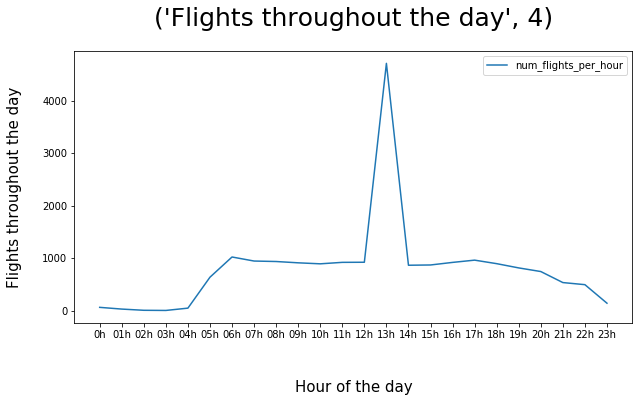

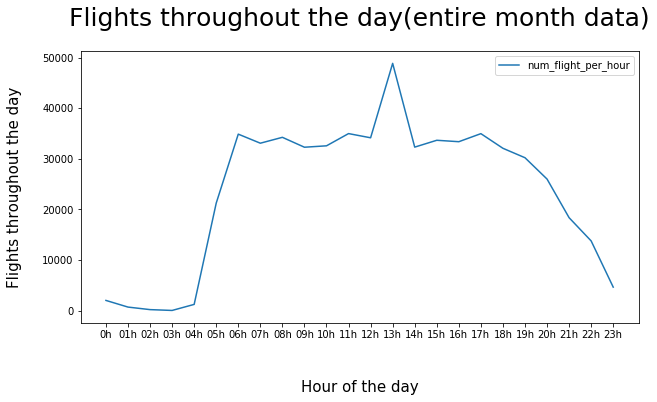

In [39]:
day = int(input("Do you wanna know the flights per hour of which specific day (1-31)\n"))

if day in range(1,32):
    through_the_day(day)
    through_month(day)
else:
    print("no such day!")


## Question 6 - Does the previous distribution (flights per hour throughout the day) vary according to the day of week


In [40]:
day_of_week = flights1.groupby(["DAY_OF_WEEK","DEP_TIME_HOURS"]).size().to_frame()\
                .rename(columns={0:"NUM_OF_FLIGHTS"}).reset_index()
day_of_week

days_of_week = day_of_week.DAY_OF_WEEK.unique().tolist()

for i in range(0,len(days_of_week)):
    query_day = day_of_week.DAY_OF_WEEK == i+1
    days_of_week[i] = day_of_week[query_day]



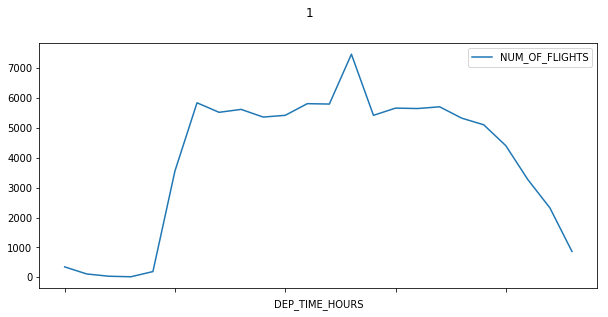

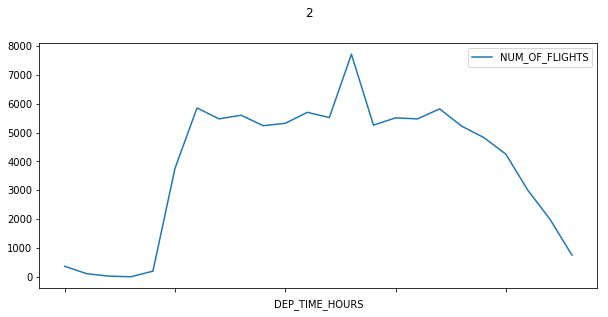

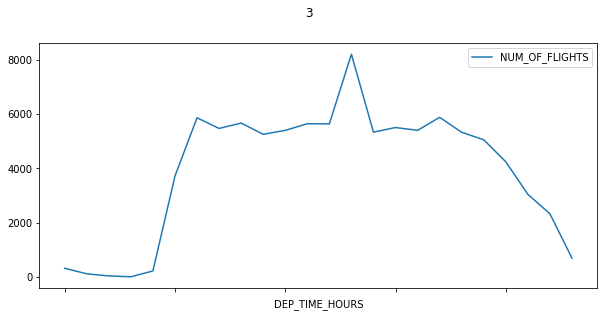

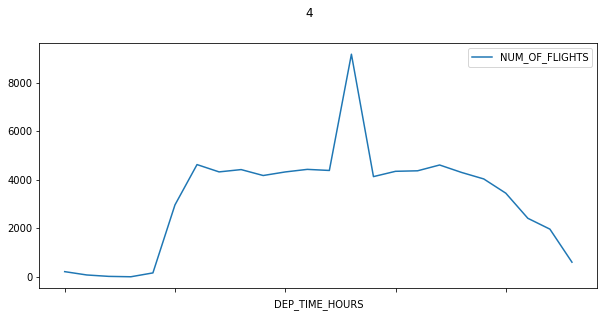

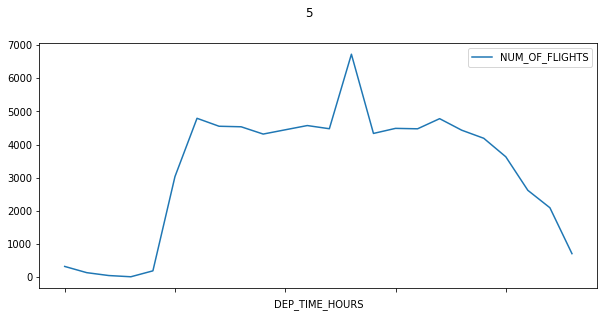

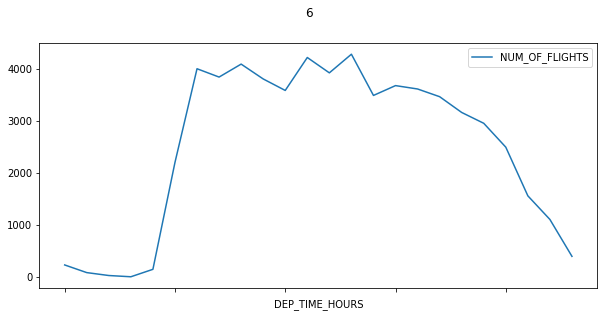

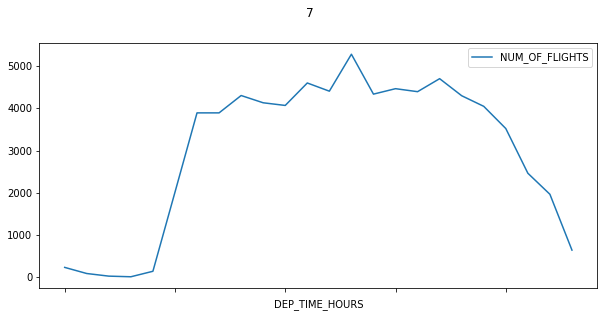

In [41]:
for i in range(0,7):
    print(days_of_week[i].plot.line(x="DEP_TIME_HOURS",y="NUM_OF_FLIGHTS", figsize=(10,5), subplots=True,title=i+1))

## Question 7
* What is the average duration of a flight?

In [42]:
average_flight_time = int(flights1 ["AIR_TIME"].mean())
print("The average duration of a flight is ",average_flight_time, " minutes")

The average duration of a flight is  111  minutes


## Question 7
* Sort flights by their duration and indicate the percentage of flights by each category.


AxesSubplot(0.125,0.125;0.775x0.755)


AIR_TIME  num_of_flights
0         8.0               6
1         9.0              12
2        10.0               8
3        11.0               3
4        12.0               4
5        13.0               9
6        14.0              37
7        15.0              69
8        16.0             115
9        17.0             190
10       18.0             274
11       19.0             416
12       20.0             678
13       21.0            1109
14       22.0            1379
15       23.0            1359
16       24.0            1217
17       25.0            1257
18       26.0            1401
19       27.0            1636
20       28.0            1977
21       29.0            2179
22       30.0            2257
23       31.0            2399
24       32.0            2494
25       33.0            2699
26       34.0            2783
27       35.0            2983
28       36.0            2979
29       37.0            3141
..        ...             ...
581     619.0               2
582     622.0               1
583     623.0               2
584     624.0               1
585     625.0               2
586     626.0               1
587     628.0               1
588     629.0               1
589     631.0               3
590     632.0               2
591     633.0               1
592     635.0               1
593     636.0               1
594     637.0               3
595     638.0               2
596     639.0               2
597     642.0               1
598     646.0               1
599     647.0               2
600     648.0               2
601     649.0               3
602     651.0               1
603     652.0               1
604     654.0               1
605     658.0               2
606     659.0               1
607     669.0               1
608     674.0               2
609     678.0               1
610     683.0               1

[611 rows x 2 columns]

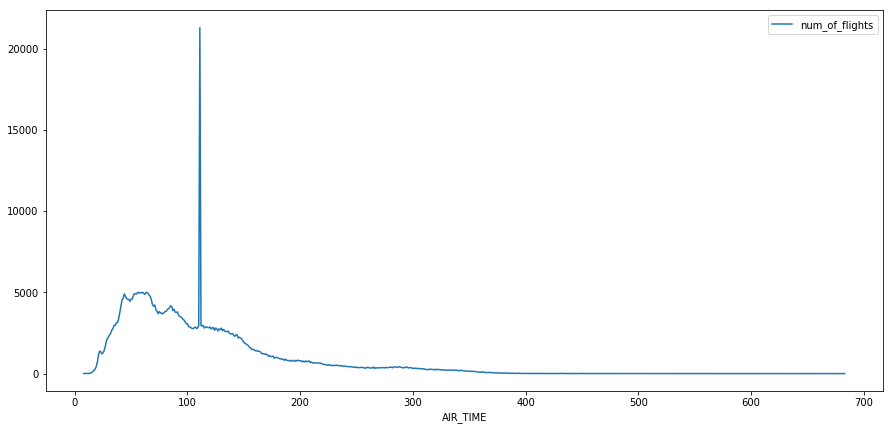

In [43]:
flights_duration= flights1.groupby(["AIR_TIME"]).size().to_frame().rename(columns={0:"num_of_flights"}).reset_index()

print(flights_duration.sort_values(["AIR_TIME"], ascending= [True]).plot.line(x="AIR_TIME",y="num_of_flights",\
                                                                              figsize=(15,7)))
flights_duration.sort_values(["AIR_TIME"], ascending= [True])

In [122]:
#We decided to divide the flights in this 3 categories based on research that we have done in Internet (Wikipédia), 
#and what would be more relevant for our analysis(for instance in Wikipédia, they also sugest to adopt another category - 
#above 720 min but we considered that this category would not be relevant as there are not flights above 720 min.
print("Categorization system adopted: ")
print("\nShort-haul flight: Under 180 minutes")
print("Medium-haul flight: 180 to 360 minutes")
print("Long-haul flight: above 360 minutes")


Categorization system adopted: 

Short-haul flight: Under 180 minutes
Medium-haul flight: 180 to 360 minutes
Long-haul flight: above 360 minutes


In [45]:
short_haul_flight = flights_duration["AIR_TIME"] < 180
flights_duration[short_haul_flight]
print("There are ",flights_duration[short_haul_flight]["num_of_flights"].sum()," short haul flights")
a = (int(flights_duration[short_haul_flight]["num_of_flights"].sum())/570118)*100
print("The precentage of Short-haul flights is: ", float(str(a)[:5]),"%")


There are  490513  short haul flights
The precentage of Short-haul flights is:  86.03 %


In [120]:
medium1_haul_flight = flights_duration["AIR_TIME"] >= 180
medium2_haul_flight = flights_duration["AIR_TIME"] <= 360
flights_duration[medium1_haul_flight][medium2_haul_flight]
flights_duration[medium1_haul_flight][medium2_haul_flight]["num_of_flights"].sum()
print("There are ",flights_duration[medium1_haul_flight][medium2_haul_flight]["num_of_flights"]\
      .sum()," Medium haul flights")
b = (int(flights_duration[medium1_haul_flight][medium2_haul_flight]["num_of_flights"].sum())/570118)*100
print("The precentage of Medium-haul flights is: ", float(str(b)[:5]),"%")

There are  77260  Medium haul flights
The precentage of Medium-haul flights is:  13.55 %


/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [121]:
long1_haul_flight = flights_duration["AIR_TIME"] > 360
flights_duration[long1_haul_flight]
flights_duration[long1_haul_flight]["num_of_flights"].sum()
print("There are ",flights_duration[long1_haul_flight]["num_of_flights"].sum()," Long haul flights")
c = ((int(flights_duration[long1_haul_flight]["num_of_flights"].sum())/570118)*100)
print("The precentage of Long-haul flights is: ", float(str(c)[:5]),"%")


There are  2345  Long haul flights
The precentage of Long-haul flights is:  0.411 %


# Part 3 - Obtain information specifically about delays.

## Question 1
* You should be able to get a view of the flights by doing the following separation: canceled flights; flights made with change of destination (diverted); flights to the correct destination.

In [48]:
#queries defined to detech CANCELLED and DIVERTED flights
flights1_correct_destination = flights["CANCELLED"] == 0.0
flights2_correct_destination = flights["DIVERTED"] == 0.0
flights3_correct_destination = flights["CANCELLED"] == 1.0
flights4_correct_destination = flights["DIVERTED"] == 1.0

#A list with total number of CANCELLED flight, DIVERTED flights, and CORRECT DESTINATION flights
status_of_flight = [[len(flights1[flights3_correct_destination]),
                      len(flights1[flights4_correct_destination]),
                     len(flights1[flights1_correct_destination][flights2_correct_destination])]]
status_of_flight = pd.DataFrame(status_of_flight)
status_of_flight.rename(columns={0:"CANCELLED", 1:"DIVERTED", 2: "CORRECT_DEST"})

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



CANCELLED  DIVERTED  CORRECT_DEST
0      17169      1249        551700

In [49]:
#Same logic but applied to each airline
#creating dict where it will be filled with respective value of cancelled, diverted, and correct destination flight of 
# each airport by applying same query to a groupbied varieble by name of airline.
flights_status_per_airline = {}
airline_name2 = flights1.Description.unique().tolist()

for i in range(0,len(airline_name2)):
    flights_by_carreers = flights1.Description == airline_name2[i]
    CANCELLED = len(flights1[flights_by_carreers][flights3_correct_destination])
    DIVERTED = len(flights1[flights_by_carreers][flights4_correct_destination])
    CORRECT_DEST = len(flights1[flights_by_carreers][flights1_correct_destination][flights2_correct_destination])
    flights_status_per_airline[airline_name2[i]] = [CANCELLED, DIVERTED, CORRECT_DEST]

#just to add the total to compare
flights_status_per_airline["Total"] = [len(flights1[flights3_correct_destination]),
                      len(flights1[flights4_correct_destination]),
                     len(flights1[flights1_correct_destination][flights2_correct_destination])]


status_of_flight_airline = pd.DataFrame(flights_status_per_airline).transpose()\
                           .rename(columns={0:"CANCELLED", 1:"DIVERTED", 2: "CORRECT_DEST"})

status_of_flight_airline

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Bo

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning:

Bo

CANCELLED  DIVERTED  CORRECT_DEST
United Air Lines Inc.           898        81         44405
Alaska Airlines Inc.            142        46         15124
Endeavor Air Inc.              1113        32         17089
JetBlue Airways                1471        70         23330
ExpressJet Airlines Inc.        997        57         19112
Frontier Airlines Inc.          188        12          9507
Allegiant Air                    58        26          6730
Hawaiian Airlines Inc.           11        11          6605
Envoy Air                       861        60         21581
Spirit Air Lines                369        12         13799
PSA Airlines Inc.              1553        56         20601
SkyWest Airlines Inc.          1562       291         60341
Virgin America                  103         6          5715
Southwest Airlines Co.         2467       186        107023
Mesa Airlines Inc.              984        37         15332
Republic Airline               1375        45         23792
American Airlines Inc.         1478       106         72014
Delta Air Lines Inc.           1539       115         69600
Total                         17169      1249        551700

## Question 2
* How many late flights were there in 2018?

In [50]:
late_flights = flights1["DEP_DELAY"] > 0
late1_flights = flights1[late_flights]
print("There are ",len(late1_flights)," late flight in January 2018")

There are  201046  late flight in January 2018



* What is the percentage of flights departing late? 

In [51]:
d = (len(late1_flights)/570118)*100
print("The percentage of flights departing late in 2018 is: ", float(str(d)[:5]), "%")

The percentage of flights departing late in 2018 is:  35.26 %


* What is the percentage of flights arriving ahead of time?

In [52]:
#Number of flights that arrived ahead of time (in absolute terms)
ahead_arrival_flights = flights1["ARR_DELAY"] < 0
ahead1__arrival_flights = flights1[ahead_arrival_flights]
print("The number of flights that arrived ahead of time was: ",\
      float(str(len(ahead1__arrival_flights)/len(flights1))[:5])*100, "%")

The number of flights that arrived ahead of time was:  63.5 %


## Question 3
* Considering the number of minutes that each delayed flight (i.e., delayed departures) has, present an image that shows, by delayed time, the frequency for that delay time.

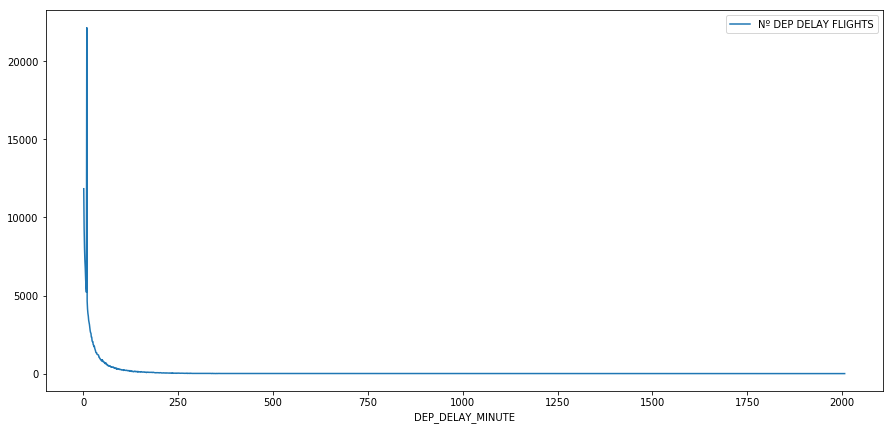

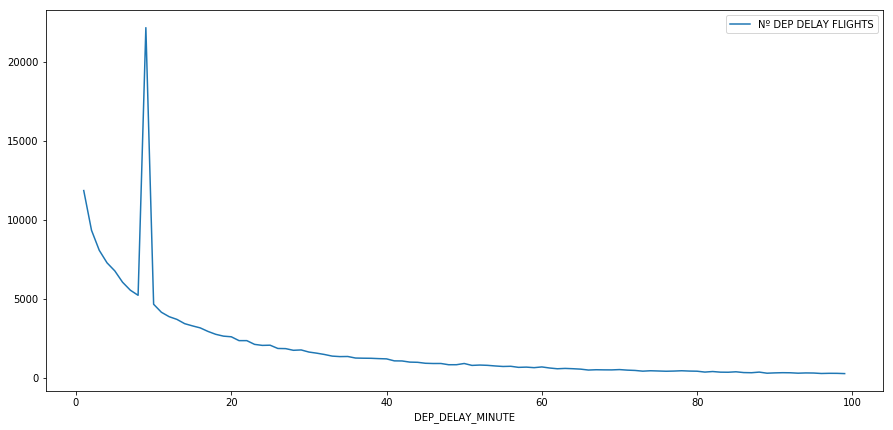

In [53]:
flights_minutes_delay_frequency = flights1.groupby(["DEP_DELAY"]).size().reset_index().rename(columns={0:"Nº DEP DELAY FLIGHTS"})
flights_DEP_DELAY = flights_minutes_delay_frequency["DEP_DELAY"] > 0
flights_final_DEP_DELAY = flights_minutes_delay_frequency[flights_DEP_DELAY]
#flights_minutes_delay_frequency
flights_final_DEP_DELAY.rename(columns={"DEP_DELAY":"DEP_DELAY_MINUTE"})\
            .plot.line(x="DEP_DELAY_MINUTE",y="Nº DEP DELAY FLIGHTS", figsize=(15,7))

#for a better analyse purpose we added a query which removes all the flights which DEP_DELAY time were greater than
# 100 minute because this represents a very small proportion of population.
query10 = flights_final_DEP_DELAY.DEP_DELAY < 100
flights_final_DEP_DELAY[query10].rename(columns={"DEP_DELAY":"DEP_DELAY_MINUTE"})\
            .plot.line(x="DEP_DELAY_MINUTE",y="Nº DEP DELAY FLIGHTS", figsize=(15,7))

* Do the same for the arrivals.

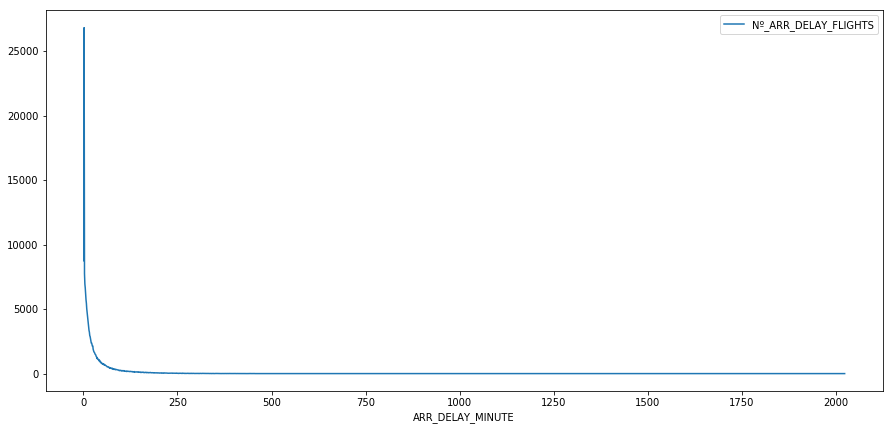

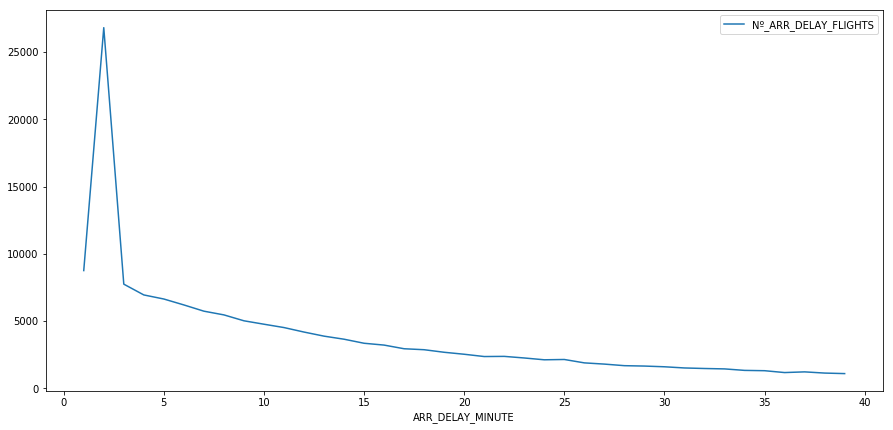

In [54]:
flights_minutes_ARR_Del_frequency = flights1.groupby(["ARR_DELAY"]).size().reset_index().rename(columns={0:"Nº_ARR_DELAY_FLIGHTS"})
flights_ARR_DELAY = flights_minutes_ARR_Del_frequency["ARR_DELAY"] > 0
flights_final_ARR_DELAY = flights_minutes_ARR_Del_frequency[flights_ARR_DELAY]
#flights_minutes_ARR_delay_frequency
flights_final_ARR_DELAY.rename(columns={"ARR_DELAY":"ARR_DELAY_MINUTE"})\
            .plot.line(x="ARR_DELAY_MINUTE",y="Nº_ARR_DELAY_FLIGHTS", figsize=(15,7))
#same logic as for DEP_DELAY but this time Delay minute <40
query11 = flights_final_ARR_DELAY.ARR_DELAY < 40
flights_final_ARR_DELAY[query11].rename(columns={"ARR_DELAY":"ARR_DELAY_MINUTE"})\
            .plot.line(x="ARR_DELAY_MINUTE",y="Nº_ARR_DELAY_FLIGHTS", figsize=(15,7))

## Question 4
* In Jan 2018, what was the week with the highest and the week with the lowest percentage of delays.

In [55]:
query3 = flights1["DEP_DELAY"] >0
flights_dep_delay_week = flights1[query3].groupby(["NUM_OF_WEEK", "DEP_DELAY"])\
                            .size().to_frame().rename(columns={0:"num_flights"}).reset_index()

final_flights_dep_delay_week = {}
for i in range(1,6):
    query5 = flights_dep_delay_week.NUM_OF_WEEK == i
    final_flights_dep_delay_week[i] = [flights_dep_delay_week[query5].num_flights.sum()]
    
nº_of_flights_with_dep_delay = pd.DataFrame(final_flights_dep_delay_week).transpose().reset_index()\
                                .rename(columns={0:"NUM_OF_DEP_DELAY_FLIGHTS"})
nº_of_flights_with_dep_delay = nº_of_flights_with_dep_delay.rename(columns={"index":"NUM_OF_WEEK"})

nº_of_flights_with_dep_delay


NUM_OF_WEEK  NUM_OF_DEP_DELAY_FLIGHTS
0            1                     63643
1            2                     48344
2            3                     46887
3            4                     29683
4            5                     12489

In [56]:
query4 = flights1["ARR_DELAY"] >0
flights_arr_delay_week = flights1[query4].groupby(["NUM_OF_WEEK", "ARR_DELAY"]).size().to_frame().rename(columns={0:"num_flights"}).reset_index()

final_flights_arr_delay_week = {}
for i in range(1,6):
    query6 = flights_arr_delay_week.NUM_OF_WEEK == i
    final_flights_arr_delay_week[i] = [flights_arr_delay_week[query6].num_flights.sum()]
    
nº_of_flights_with_arr_delay = pd.DataFrame(final_flights_arr_delay_week).transpose().reset_index()\
                            .rename(columns={0:"NUM_OF_ARR_DELAY_FLIGHTS"})
nº_of_flights_with_arr_delay = nº_of_flights_with_arr_delay.rename(columns={"index":"NUM_OF_WEEK"})
nº_of_flights_with_arr_delay

NUM_OF_WEEK  NUM_OF_ARR_DELAY_FLIGHTS
0            1                     57840
1            2                     48336
2            3                     47069
3            4                     30884
4            5                     13927

In [57]:
Nº_of_dep_and_arr_delay_flights  = flights1[query3][query4].groupby(["NUM_OF_WEEK"]).size().to_frame()\
                            .rename(columns={ 0:"NUM_BOTH_DELAY_FLIGHTS"}).reset_index()
Nº_of_dep_and_arr_delay_flights

/home/swc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



NUM_OF_WEEK  NUM_BOTH_DELAY_FLIGHTS
0            1                   47334
1            2                   36097
2            3                   35277
3            4                   19635
4            5                    8545

In [58]:
flights_per_week = flights1.groupby(["NUM_OF_WEEK"]).size().to_frame().rename(columns={ 0:"TOTAL_NUM_FLIGHTS"}).reset_index()
flights_per_week

NUM_OF_WEEK  TOTAL_NUM_FLIGHTS
0            1             130553
1            2             126759
2            3             128060
3            4             128311
4            5              56435

The week with the highest percentage of delays is week 1 with  13.005904040917846  % and the week with the lowest percentage of delays is week 5 with  3.134614237754289 %

AxesSubplot(0.125,0.125;0.775x0.755)


NUM_OF_WEEK  NUM_OF_DEP_DELAY_FLIGHTS  NUM_OF_ARR_DELAY_FLIGHTS  \
0            1                     63643                     57840   
1            2                     48344                     48336   
2            3                     46887                     47069   
3            4                     29683                     30884   
4            5                     12489                     13927   

   NUM_BOTH_DELAY_FLIGHTS  NUM_OF_DELAY_FLIGHTS  PERCENTAGE_OF_DELAY_FLIGHTS  
0                   47334                 74149                    13.005904  
1                   36097                 60583                    10.626397  
2                   35277                 58679                    10.292431  
3                   19635                 40932                     7.179566  
4                    8545                 17871                     3.134614

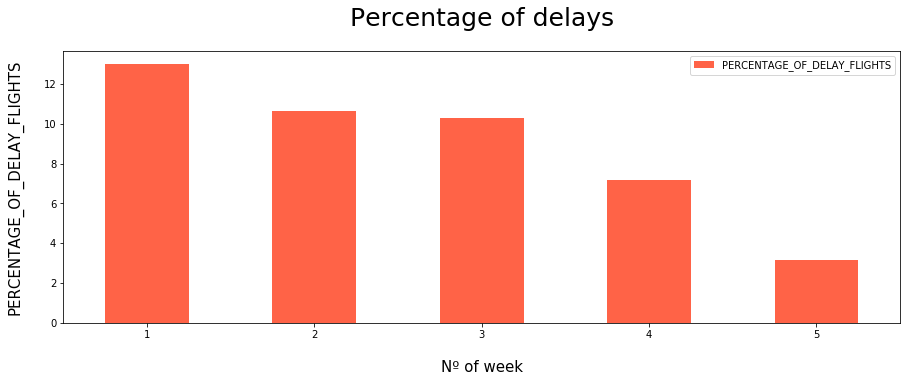

In [59]:

final_delay_flights = pd.merge(nº_of_flights_with_dep_delay, nº_of_flights_with_arr_delay\
                               ,left_index=True, right_index=True)
final_delay_flights = final_delay_flights.drop(columns="NUM_OF_WEEK_y")
final_delay_flights = final_delay_flights.rename(columns={"NUM_OF_WEEK_x":"NUM_OF_WEEK"})
final_delay_flights = final_delay_flights.merge(Nº_of_dep_and_arr_delay_flights, how="left",on="NUM_OF_WEEK")
final_delay_flights["NUM_OF_DELAY_FLIGHTS"]=final_delay_flights["NUM_OF_DEP_DELAY_FLIGHTS"]+\
                                            final_delay_flights["NUM_OF_ARR_DELAY_FLIGHTS"]-\
                                            final_delay_flights["NUM_BOTH_DELAY_FLIGHTS"]

final_delay_flights["PERCENTAGE_OF_DELAY_FLIGHTS"] = (final_delay_flights["NUM_OF_DELAY_FLIGHTS"]/len(flights1))*100

print("The week with the highest percentage of delays is week 1 with "\
          ,final_delay_flights.PERCENTAGE_OF_DELAY_FLIGHTS.max()," % and the week with the lowest percentage of\
 delays is week 5 with ", final_delay_flights.PERCENTAGE_OF_DELAY_FLIGHTS.min(),"%\n")

print(final_delay_flights.plot.bar(x="NUM_OF_WEEK",y="PERCENTAGE_OF_DELAY_FLIGHTS",\
                                    width = 0.5, color = "tomato", figsize =(15, 5)))
plt.xticks(rotation=0)
plt.title("Percentage of delays", fontsize=25, pad=25)
plt.xlabel("Nº of week", fontsize = 15, labelpad = 20)
plt.ylabel("PERCENTAGE_OF_DELAY_FLIGHTS", fontsize = 15, labelpad = 20)

final_delay_flights

* What was the difference in flight volume between the highest week and the lowest week

In [60]:
print("The difference is ",final_delay_flights.NUM_OF_DELAY_FLIGHTS.max()-final_delay_flights.NUM_OF_DELAY_FLIGHTS.min()," flights")

The difference is  56278  flights


# Part 4 - Selection of variables correlated with the study

In [61]:
flights1.columns

Index(['YEAR', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'NUM_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'Description', 'OP_CARRIER_FL_NUM', 'ORIGIN',
       'ORIGIN_CITY_NAME', 'DEST', 'DEST_CITY_NAME', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'DEP_TIME_HOURS'],
      dtype='object')

In [109]:
#We decided to drop the following columns
flights2 = flights1.drop(columns=["YEAR", "MONTH", "OP_UNIQUE_CARRIER", "OP_CARRIER_FL_NUM",\
                                  'ORIGIN_CITY_NAME','DEST_CITY_NAME',\
                                   'CRS_ELAPSED_TIME',"DEP_TIME_HOURS"])
flights2

DAY_OF_MONTH  DAY_OF_WEEK  NUM_OF_WEEK            Description ORIGIN  \
0                 27            6            4  United Air Lines Inc.    FLL   
1                 27            6            4  United Air Lines Inc.    SEA   
2                 27            6            4  United Air Lines Inc.    DCA   
3                 27            6            4  United Air Lines Inc.    LAX   
4                 27            6            4  United Air Lines Inc.    JAX   
5                 27            6            4  United Air Lines Inc.    IAH   
6                 27            6            4  United Air Lines Inc.    EWR   
7                 27            6            4  United Air Lines Inc.    HNL   
8                 27            6            4  United Air Lines Inc.    LAS   
9                 27            6            4  United Air Lines Inc.    IAD   
10                27            6            4  United Air Lines Inc.    LAX   
11                27            6            4  United Air Lines Inc.    SFO   
12                27            6            4  United Air Lines Inc.    IAD   
13                27            6            4  United Air Lines Inc.    EWR   
14                27            6            4  United Air Lines Inc.    DEN   
15                27            6            4  United Air Lines Inc.    HDN   
16                27            6            4  United Air Lines Inc.    IAD   
17                27            6            4  United Air Lines Inc.    TPA   
18                27            6            4  United Air Lines Inc.    RDU   
19                27            6            4  United Air Lines Inc.    CLE   
20                27            6            4  United Air Lines Inc.    OGG   
21                27            6            4  United Air Lines Inc.    DEN   
22                27            6            4  United Air Lines Inc.    SJC   
23                27            6            4  United Air Lines Inc.    IAD   
24                27            6            4  United Air Lines Inc.    HNL   
25                27            6            4  United Air Lines Inc.    BOS   
26                27            6            4  United Air Lines Inc.    TPA   
27                27            6            4  United Air Lines Inc.    IAH   
28                27            6            4  United Air Lines Inc.    SAN   
29                27            6            4  United Air Lines Inc.    IAD   
...              ...          ...          ...                    ...    ...   
570088            11            4            2   Delta Air Lines Inc.    ATL   
570089            11            4            2   Delta Air Lines Inc.    MSP   
570090            11            4            2   Delta Air Lines Inc.    DEN   
570091            11            4            2   Delta Air Lines Inc.    ATL   
570092            11            4            2   Delta Air Lines Inc.    SLC   
570093            11            4            2   Delta Air Lines Inc.    MSN   
570094            11            4            2   Delta Air Lines Inc.    ATL   
570095            11            4            2   Delta Air Lines Inc.    SDF   
570096            11            4            2   Delta Air Lines Inc.    BOS   
570097            11            4            2   Delta Air Lines Inc.    MSP   
570098            11            4            2   Delta Air Lines Inc.    MSP   
570099            11            4            2   Delta Air Lines Inc.    MCO   
570100            11            4            2   Delta Air Lines Inc.    ATL   
570101            11            4            2   Delta Air Lines Inc.    FLL   
570102            11            4            2   Delta Air Lines Inc.    LAS   
570103            11            4            2   Delta Air Lines Inc.    MSP   
570104            11            4            2   Delta Air Lines Inc.    ATL   
570105            11            4            2   Delta Air Lines Inc.    SLC   
570106  

In [110]:
def dummy(time):
    if time>0:
        return float(1)
    else:
        return float(0)

In [111]:
flights2["DEP_DELAY_DUMMY"] = flights2.apply(lambda row: dummy(row["DEP_DELAY"]),axis = 1)
flights2["ARR_DELAY_DUMMY"] = flights2.apply(lambda row: dummy(row["ARR_DELAY"]),axis = 1)
flights2["ON_LAND_DELAY"]=flights2.ACTUAL_ELAPSED_TIME - flights2.AIR_TIME
flights2["DISTANCE_PER_MINUTE_OF_FLY"]=flights2.DISTANCE/flights2.AIR_TIME



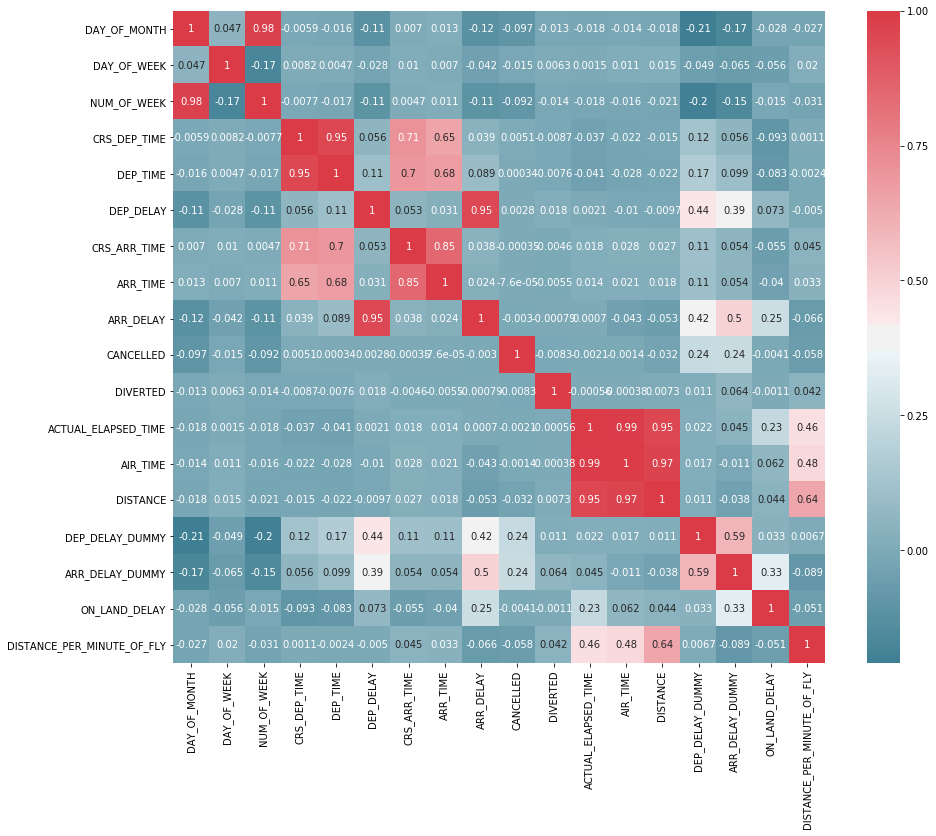

In [112]:
corr=flights2.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

In [113]:
query_dep_delay = flights2.DEP_DELAY>0
query_arr_delay = flights2.ARR_DELAY>0
flights3 = flights2[query_dep_delay]
flights4 = flights2[query_arr_delay]


In [114]:
# Dont run this twice, because a permanent change is done in flights3 dataframe - elimination of outliers
# because the reduction on the sample of variable, running this cell again will create new smaller percentile
DEP_DELAY_PERC_3 = flights3.DEP_DELAY.quantile(0.75)
DEP_DELAY_PERC_1 = flights3.DEP_DELAY.quantile(0.25)

DEP_DELAY_OUTLIERS_1 = DEP_DELAY_PERC_1-((DEP_DELAY_PERC_3-DEP_DELAY_PERC_1)*1.5)

DEP_DELAY_OUTLIERS_3 = DEP_DELAY_PERC_3 + ((DEP_DELAY_PERC_3-DEP_DELAY_PERC_1)*1.5)

query_DEP_DELAY_OUTLIERS_1 = flights3.DEP_DELAY > DEP_DELAY_OUTLIERS_1
query_DEP_DELAY_OUTLIERS_3 = flights3.DEP_DELAY < DEP_DELAY_OUTLIERS_3
flights3 = flights3[query_DEP_DELAY_OUTLIERS_1][query_DEP_DELAY_OUTLIERS_3]

print(DEP_DELAY_OUTLIERS_1)   #-42.5
print(DEP_DELAY_OUTLIERS_3)   #89.5   

-42.5
89.5


In [124]:
#DEP_DELAY Regression
# independent variables
X = flights3[["ON_LAND_DELAY"]+["CRS_DEP_TIME"]+["DAY_OF_MONTH"]+["DISTANCE"]]
# dependent (target) variable
Y = flights3["DEP_DELAY"]

# Create linear regression object and fit the model to the data
regr = linear_model.LinearRegression(normalize=True).fit(X, Y)
r_squared = regr.score(X,Y) # Will return the R^2
regr_cofficients = regr.coef_ # Will return ß1 to ßn
interception = regr.intercept_ # Will return ß0

print(r_squared)
print(regr_cofficients)
print(interception)

0.014515550156042112
[ 0.12641604  0.00379236 -0.07927746 -0.00128743]
13.78822102480913


In [126]:
### Here we started by calculating the quantile 3 and quantile 1.
ARR_DELAY_PERC_3 = flights4.ARR_DELAY.quantile(0.75)
ARR_DELAY_PERC_1 = flights4.ARR_DELAY.quantile(0.25)
#Here we calculated the minimum and maximum value acepted that will be used to eliminate moderate and severe outliers from 
#the dependent variable of the regression:"ARR_DELAY".
ARR_DELAY_OUTLIERS_1 = ARR_DELAY_PERC_1-((ARR_DELAY_PERC_3-ARR_DELAY_PERC_1)*1.5)

ARR_DELAY_OUTLIERS_3 = ARR_DELAY_PERC_3 + ((ARR_DELAY_PERC_3-ARR_DELAY_PERC_1)*1.5)
#Here we eliminate de outliers applying query
query_ARR_DELAY_OUTLIERS_1 = flights4.ARR_DELAY > ARR_DELAY_OUTLIERS_1
query_ARR_DELAY_OUTLIERS_3 = flights4.ARR_DELAY < ARR_DELAY_OUTLIERS_3
flights4 = flights4[query_ARR_DELAY_OUTLIERS_1][query_ARR_DELAY_OUTLIERS_3]

print(ARR_DELAY_OUTLIERS_1)
print(ARR_DELAY_OUTLIERS_3)

-48.5
91.5


In [119]:
#ARR_DELAY Regression
# independent variables
X1 = flights4[["ON_LAND_DELAY"]+["DISTANCE_PER_MINUTE_OF_FLY"]+["DAY_OF_MONTH"]+["DEP_TIME"]]
# dependent (target) variable
Y1 = flights4["ARR_DELAY"]

# Create linear regression object and fit the model to the data
regr1 = linear_model.LinearRegression(normalize=True).fit(X1, Y1)
r_squared1 = regr1.score(X1,Y1) # Will return the R^2
regr_cofficients1 = regr1.coef_ # Will return ß1 to ßn
interception1 = regr1.intercept_ # Will return ß0

print(r_squared1)
print(regr_cofficients1)
print(interception1)

0.024665433005489956
[ 0.56289265 -0.04184534 -0.38671103  0.01498131]
2.9152859903688793


# We hope you have enjoyed reading all the codes as much as we have when wrote them. Any question feel free to ask us. 